# Load data

In [18]:
import yfinance as yf
df = yf.Ticker("006208.TW").history(period = "10y")
df #檢查用

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2014-04-15 00:00:00+08:00,25.250614,25.257863,25.207115,25.207115,70000,0.0,0.0,0.0
2014-04-16 00:00:00+08:00,25.156364,25.221611,25.156364,25.221611,3000,0.0,0.0,0.0
2014-04-17 00:00:00+08:00,25.170867,25.192616,25.163616,25.192616,90000,0.0,0.0,0.0
2014-04-18 00:00:00+08:00,25.257865,25.308613,25.257865,25.308613,6000,0.0,0.0,0.0
2014-04-21 00:00:00+08:00,25.272359,25.330355,25.272359,25.330355,7000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-04-09 00:00:00+08:00,93.300003,95.449997,93.300003,95.449997,4059945,0.0,0.0,0.0
2024-04-10 00:00:00+08:00,95.449997,95.500000,95.000000,95.349998,2959208,0.0,0.0,0.0
2024-04-11 00:00:00+08:00,94.800003,95.000000,94.400002,94.949997,4120034,0.0,0.0,0.0


#  Filter Data

In [19]:
df = df.filter(["Close"]) # 過濾需要的Topic
df = df.rename(columns = {"Close": "RealValue"})
df #檢查用

,RealValue
Date,
2014-04-15 00:00:00+08:00,25.207115
2014-04-16 00:00:00+08:00,25.221611
2014-04-17 00:00:00+08:00,25.192616
2014-04-18 00:00:00+08:00,25.308613
2014-04-21 00:00:00+08:00,25.330355
...,...
2024-04-09 00:00:00+08:00,95.449997
2024-04-10 00:00:00+08:00,95.349998
2024-04-11 00:00:00+08:00,94.949997


# Visualize data
check the style packages in the list

In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


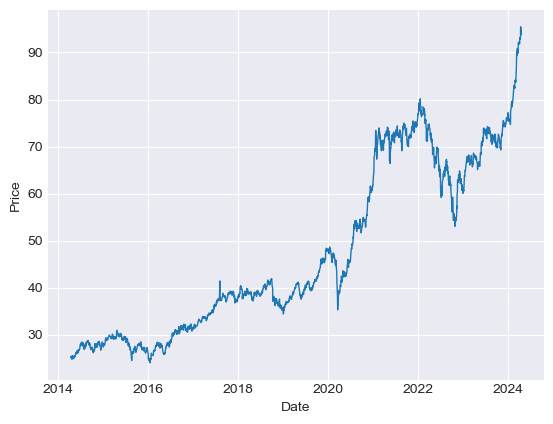

In [21]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df["RealValue"], linewidth = 1)
plt.show()

# Standardize

In [22]:
from sklearn.preprocessing import MinMaxScaler

# 把數據按比例縮小至0~1範圍
scaler=MinMaxScaler(feature_range = (0, 1))
scaled_prices=scaler.fit_transform(df.values)
scaled_prices

array([[0.01602382],
       [0.01622688],
       [0.0158207 ],
       ...,
       [0.9929959 ],
       [0.99089476],
       [0.97688656]])

# Construct datasets

In [23]:
import numpy as np
MOVING_WIN_SIZE = 60 #設定天數

all_x, all_y = [], []
for i in range(len(scaled_prices)-MOVING_WIN_SIZE):
    x=scaled_prices[i:i+MOVING_WIN_SIZE]
    y=scaled_prices[i+MOVING_WIN_SIZE]
    all_x.append(x)
    all_y.append(y)

all_x, all_y = np.array(all_x), np.array(all_y) # data type: python list => numpy array

In [24]:
all_x.shape

(2379, 60, 1)

In [25]:
all_y.shape

(2379, 1)

# Split dataset

In [26]:
DS_SPLIT =0.8
train_ds_size = round(all_x.shape[0] * DS_SPLIT)
train_x, train_y=all_x[:train_ds_size], all_y[:train_ds_size]
test_x, test_y=all_x[train_ds_size:], all_y[train_ds_size:]

In [27]:
train_x.shape

(1903, 60, 1)

In [28]:
train_y.shape

(1903, 1)

In [29]:
test_x.shape

(476, 60, 1)

In [30]:
test_y.shape

(476, 1)

# Construct model

In [31]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(
    units=50,
    return_sequences=True,
    input_shape=(train_x.shape[1],1
)))

model.add(LSTM(
    units=50,
    return_sequences=False
))

model.add(Dense(
    units=25
))

model.add(Dense(
    units=1
))

model.summary()

d:\Program\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer="adam", loss="mean_squared_error")

# Train Model

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping(monitor = "val_loss", patience=10, restore_best_weights = True)
train_history = model.fit(
    train_x,
    train_y,
    validation_split=0.2,
    callbacks=[callback],
    epochs=1000
)

Epoch 1/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0063 - val_loss: 8.4496e-04
Epoch 2/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.8292e-04 - val_loss: 8.6225e-04
Epoch 3/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.1012e-04 - val_loss: 5.9327e-04
Epoch 4/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.7228e-04 - val_loss: 5.5560e-04
Epoch 5/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.5663e-04 - val_loss: 6.1622e-04
Epoch 6/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.5439e-04 - val_loss: 4.6848e-04
Epoch 7/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.2414e-04 - val_loss: 6.4425e-04
Epoch 8/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.3912e-04 - val_loss: 5.5656e-04
Epoch 9/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.2500e-04 - val_loss: 4.3509e-04
Epoch 10/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.7887e-05 - val_loss: 7.0303e-04
Epoch 11/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step

# Evaluate Model

In [34]:
predicts = model.predict(test_x)
predicts

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


array([[0.63844866],
       [0.6340269 ],
       [0.63000524],
       [0.62675077],
       [0.62505597],
       [0.62302107],
       [0.6196178 ],
       [0.6154388 ],
       [0.6110945 ],
       [0.6051837 ],
       [0.5995107 ],
       [0.5947248 ],
       [0.5916767 ],
       [0.5908397 ],
       [0.5901966 ],
       [0.59060574],
       [0.59184694],
       [0.5926204 ],
       [0.59362745],
       [0.5938272 ],
       [0.59518236],
       [0.5989156 ],
       [0.60448366],
       [0.6107461 ],
       [0.61628646],
       [0.6215212 ],
       [0.62525845],
       [0.62867665],
       [0.6313325 ],
       [0.6326515 ],
       [0.63087654],
       [0.62715644],
       [0.62193835],
       [0.6158977 ],
       [0.608893  ],
       [0.6009296 ],
       [0.5942542 ],
       [0.5873162 ],
       [0.57970446],
       [0.57245785],
       [0.56755847],
       [0.5639854 ],
       [0.560843  ],
       [0.55663395],
       [0.54970086],
       [0.5407631 ],
       [0.5317426 ],
       [0.522

In [35]:
predicts=scaler.inverse_transform(predicts)
predicts

array([[69.640015],
       [69.324356],
       [69.03727 ],
       [68.80494 ],
       [68.68395 ],
       [68.53869 ],
       [68.295746],
       [67.99741 ],
       [67.68729 ],
       [67.265335],
       [66.86036 ],
       [66.51871 ],
       [66.30112 ],
       [66.24136 ],
       [66.19546 ],
       [66.22466 ],
       [66.31327 ],
       [66.368484],
       [66.44038 ],
       [66.454636],
       [66.55138 ],
       [66.81788 ],
       [67.21536 ],
       [67.662415],
       [68.05793 ],
       [68.43162 ],
       [68.69841 ],
       [68.94242 ],
       [69.13202 ],
       [69.22617 ],
       [69.099464],
       [68.8339  ],
       [68.461395],
       [68.030174],
       [67.53013 ],
       [66.961655],
       [66.485115],
       [65.98984 ],
       [65.44646 ],
       [64.929146],
       [64.57939 ],
       [64.324326],
       [64.1     ],
       [63.799526],
       [63.304596],
       [62.666557],
       [62.022614],
       [61.34362 ],
       [60.82574 ],
       [60.501118],


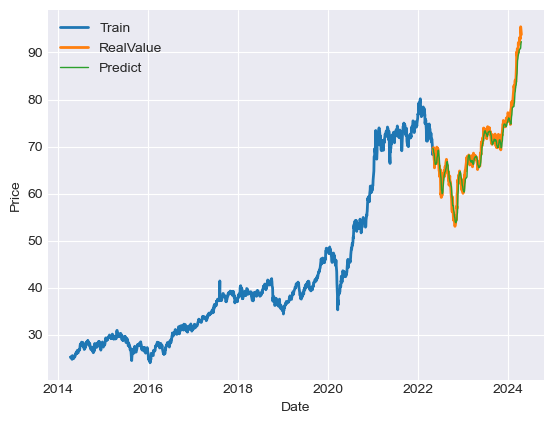

In [36]:
train_df=df[:train_ds_size + MOVING_WIN_SIZE]
test_df=df[train_ds_size+MOVING_WIN_SIZE:]
test_df=test_df.assign(Predict=predicts)

plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(train_df["RealValue"], linewidth=2)
plt.plot(test_df["RealValue"], linewidth=2)
plt.plot(test_df["Predict"], linewidth=1)
plt.legend(("Train", "RealValue", "Predict"))
plt.show()

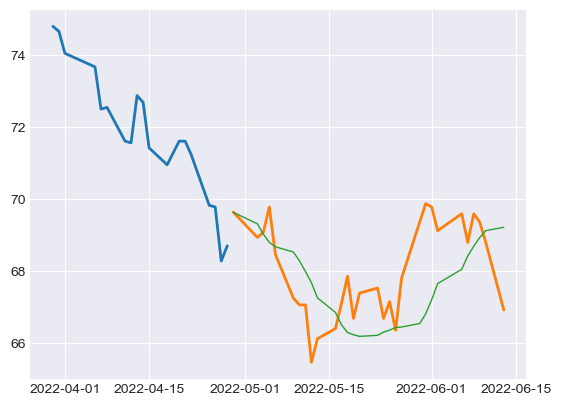

In [37]:
plt.plot(train_df["RealValue"][-20:], linewidth=2)
plt.plot(test_df["RealValue"][:30], linewidth=2)
plt.plot(test_df["Predict"][:30], linewidth=1)
plt.show()

In [38]:
test_df=test_df.assign(Shifted=test_df["RealValue"].shift(1))
test_df.iat[0, -1]=train_df.iat[-1, -1]
test_df

,RealValue,Predict,Shifted
Date,,,
2022-04-29 00:00:00+08:00,69.648277,69.640015,68.710258
2022-05-03 00:00:00+08:00,68.944756,69.324356,69.648277
2022-05-04 00:00:00+08:00,69.085464,69.037270,68.944756
2022-05-05 00:00:00+08:00,69.788986,68.804939,69.085464
2022-05-06 00:00:00+08:00,68.475754,68.683952,69.788986
...,...,...,...
2024-04-09 00:00:00+08:00,95.449997,90.949913,93.099998
2024-04-10 00:00:00+08:00,95.349998,91.241966,95.449997
2024-04-11 00:00:00+08:00,94.949997,91.611320,95.349998


In [39]:
from sklearn.metrics import mean_squared_error

predict_rmse = mean_squared_error(test_df["RealValue"], test_df["Predict"], squared = False)
predict_cvrmse = predict_rmse / test_df["RealValue"].mean() * 100
predict_cvrmse

2.3242796562245034

In [40]:
shifted_rmse = mean_squared_error(test_df["RealValue"], test_df["Shifted"], squared = False)
shifted_cvrmse = shifted_rmse / test_df["RealValue"].mean() * 100
shifted_cvrmse

1.0697867676424027